# DSC 530 Term Project

Nicholas De Santos

DSC 530

Term Project: Analysis of the Success of the Move Industry

In [25]:
#necessary prep and set up
import numpy as np
import pandas as pd

import random

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:
import thinkstats2
import thinkplot

## Introduction and Background
    The main purpose of this project is to do an analysis of what kind of factors and characteristics (if any) of different movies can help us determine how successful a movie will be. Specifically, two measures of success that we might be looking at during this analysis is first and foremost the amount of gross revenue the movie brought in as well as how popular the movie was with audiences. For the latter we will consider an IMDb rating as our variable to help measure this.
    
    The dataset that we are working with is a movie dataset containing information about 6820 different movie titles. The data was scraped from IMDb databases. There are movies from different years between 1986 and 2016. There are 220 movies per year and each movie has the following infomration included in the dataset:
    
**budget**: the budget of a movie. Some movies don't have this, so it appears as 0

**company**: the production company

**country**: country of origin

**director**: the director

**genre**: main genre of the movie.

**gross**: revenue of the movie

**name**: name of the movie

**vrating**: rating of the movie (R, PG, etc.)

**released**: release date (YYYY-MM-DD)

**runtime**: duration of the movie

**score**: IMDb user rating

**votes**: number of user votes

**star**: main actor/actress

**writer**: writer of the movie

**year**: year of release

    

## Data and Variables

In [4]:
#getting reading data in
url = 'https://raw.githubusercontent.com/nickxdesantos/ThinkStats2/master/Term%20Project%20-%20Nicholas%20De%20Santos/movies.csv'
moviedf = pd.read_csv(url)
print(moviedf.head(10))

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick

In [5]:
### VARIABLE SELECTION ###
#NUMERICAL VARIABLES

# IMDb Score: A movie rating system based one a 1-10 
#rating scale where 1 is the lowest rating and 10 the highest
imdb_score = moviedf[["score"]]

# IMDb Votes: How many votes did this movie recieve on the IMDb site
imdb_votes = moviedf[["votes"]]

# Budget: Amount of money used to make the movie
movie_budget = moviedf[["budget"]]

# Gross Revenue: Total gross revenue that the movie generated
gross_revenue = moviedf[["gross"]]

# Runtime: How long is the movie
runtime = moviedf[["runtime"]]

#CATEGORICAL VARIABLES
# Genre
genre = moviedf[["genre"]]

    Above are the varaibles I selected to do an analysis. I selected "score" and "gross" as varaibles because there are the varaiables I am planning to use as a measure of success in this analysis of the film industry. Similarly, votes could also be used as a measure of success but the amount of votes can also be an indicator on how much revenue a movie will make. Other varaibles that I chose to include in this analysis are the budget of the movie, the runtime for each movie, the year the movie was released and the genre of the movie. The movie genre is the only variable that is a categorical one, hence it is the only one in which we cannot create a histogram for.

## Exploring Variables Selected:

### Histogram: Score

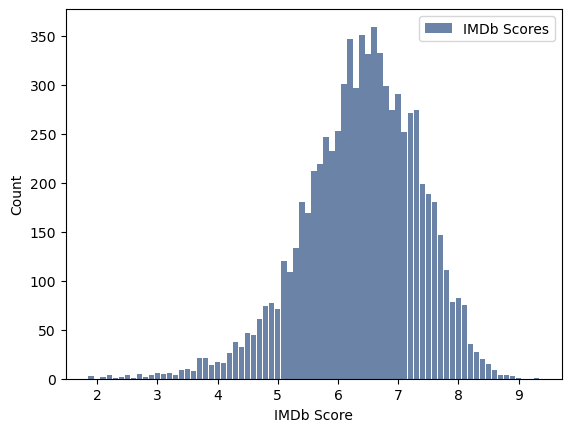

In [6]:
hist1 = thinkstats2.Hist(moviedf.score, label='IMDb Scores')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='IMDb Score', ylabel='Count')

In [7]:
# summary statistics
#mean
score_mean = moviedf.score.mean()
#median
score_median = moviedf.score.median()
#mode
score_mode = moviedf.score.mode()
#standard deviation
score_std = moviedf.score.std()
#varience
score_var = moviedf.score.var()

print("Score Mean: ", score_mean, "\nScore Median: ", score_median, "\nScore Mode: ", score_mode, "\nScore Standard Dev: ", score_std, "\nScore Varience: ", score_var)         

Score Mean:  6.390410958904109 
Score Median:  6.5 
Score Mode:  0    6.6
Name: score, dtype: float64 
Score Standard Dev:  0.9688416402530576 
Score Varience:  0.9386541238882352


### Histogram: Votes

<Axes: xlabel='Votes', ylabel='Frequency'>

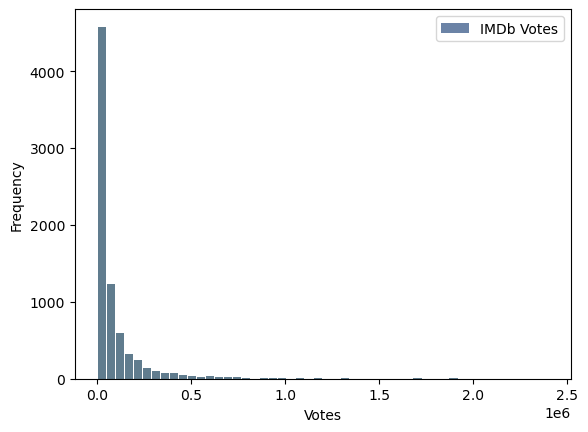

In [8]:
from matplotlib import pyplot as plt
hist2 = thinkstats2.Hist(moviedf.votes, label='IMDb Votes')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Votes', ylabel='Count')


moviedf.votes.plot.hist(grid=False, bins=50, rwidth=0.9,
                   color='#607c8e')

In [9]:
# summary statistics
#mean
votes_mean = moviedf.votes.mean()
#median
votes_median = moviedf.votes.median()
#mode
votes_mode = moviedf.votes.mode()
#standard deviation
votes_std = moviedf.votes.std()
#varience
votes_var = moviedf.votes.var()

print("Votes Mean: ", votes_mean, "\nVotes Median: ", votes_median, "\nVotes Mode: ", votes_mode, "\nVotes Standard Dev: ", votes_std, "\nVotes Varience: ", votes_var)         

Votes Mean:  88108.50476190477 
Votes Median:  33000.0 
Votes Mode:  0    13000.0
Name: votes, dtype: float64 
Votes Standard Dev:  163323.7639095057 
Votes Varience:  26674651857.567955


### Histogram: Budget

<Axes: xlabel='Movie Budget', ylabel='Frequency'>

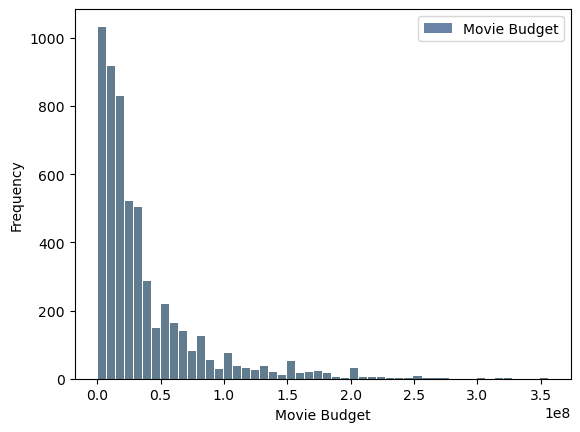

In [10]:
hist3 = thinkstats2.Hist(moviedf.budget, label='Movie Budget')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Movie Budget', ylabel='Count')

moviedf.budget.plot.hist(grid=False, bins=50, rwidth=0.9,
                   color='#607c8e')

In [11]:
# summary statistics
#mean
budget_mean = moviedf.budget.mean()
#median
budget_median = moviedf.budget.median()
#mode
budget_mode = moviedf.budget.mode()
#standard deviation
budget_std = moviedf.budget.std()
#varience
budget_var = moviedf.budget.var()

print("Budget Mean: ", budget_mean, "\nBudget Median: ", budget_median, "\nBudget Mode: ", budget_mode, "\nBudget Standard Dev: ", budget_std, "\nBudget Varience: ", budget_var)         

Budget Mean:  35589876.192650534 
Budget Median:  20500000.0 
Budget Mode:  0    20000000.0
Name: budget, dtype: float64 
Budget Standard Dev:  41457296.60193096 
Budget Varience:  1718707441540476.5


### Histogram: Gross

<Axes: xlabel='Gross Revenue', ylabel='Frequency'>

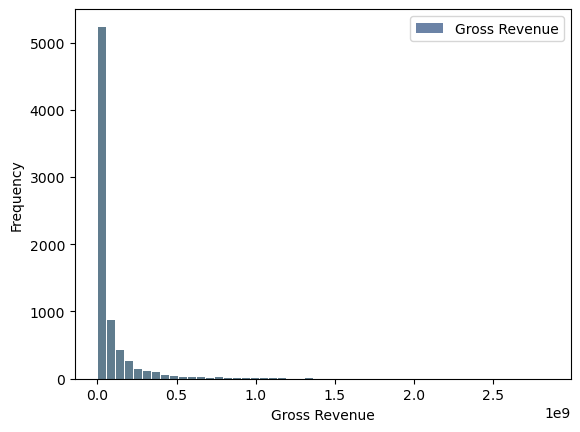

In [12]:
hist4 = thinkstats2.Hist(moviedf.gross)
thinkplot.Hist(hist4, label='Gross Revenue')
thinkplot.Config(xlabel='Gross Revenue', ylabel='Count')

moviedf.gross.plot.hist(grid=False, bins=50, rwidth=0.9,
                   color='#607c8e')

In [94]:
# summary statistics
#mean
gross_mean = moviedf.gross.mean()
#median
gross_median = moviedf.gross.median()
#mode
gross_mode = moviedf.gross.mode()
#standard deviation
gross_std = moviedf.gross.std()
#varience
gross_var = moviedf.gross.var()

print("Gross Mean: ", gross_mean, "\nGross Median: ", gross_median, "\nGross Mode: ", gross_mode, "\nGross Standard Dev: ", gross_std, "\nGross Varience: ", gross_var)         

Gross Mean:  78500541.01778312 
Gross Median:  20205757.0 
Gross Mode:  0    14000000.0
Name: gross, dtype: float64 
Gross Standard Dev:  165725124.31875733 
Gross Varience:  2.746481683046757e+16


### Histogram: Runtime

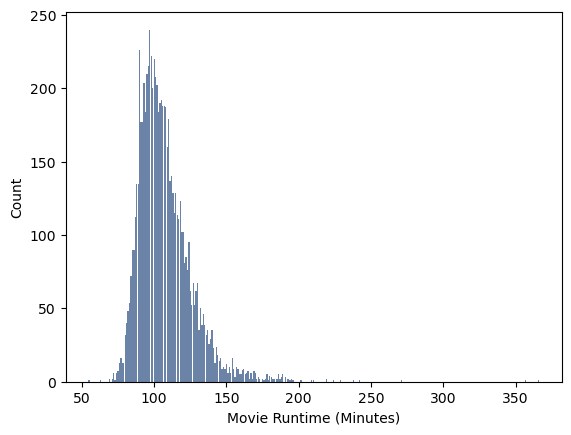

In [95]:
hist5 = thinkstats2.Hist(moviedf.runtime, label='Movie Runtime')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Movie Runtime (Minutes)', ylabel='Count')

In [15]:
# summary statistics
#mean
runtime_mean = moviedf.runtime.mean()
#median
runtime_median = moviedf.runtime.median()
#mode
runtime_mode = moviedf.runtime.mode()
#standard deviation
runtime_std = moviedf.runtime.std()
#varience
runtime_var = moviedf.runtime.var()

print("Runtime Mean: ", runtime_mean, "\nRuntime Median: ", runtime_median, "\nRuntime Mode: ", runtime_mode, "\nRuntime Standard Dev: ", runtime_std, "\nRuntime Varience: ", runtime_var)   

Runtime Mean:  107.2616127348643 
Runtime Median:  104.0 
Runtime Mode:  0    97.0
Name: runtime, dtype: float64 
Runtime Standard Dev:  18.581247313480592 
Runtime Varience:  345.26275172472975


### Analysis: Genre

<Axes: >

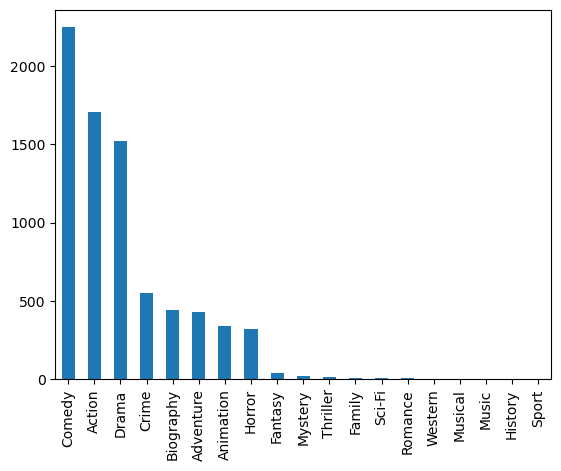

In [16]:
moviedf['genre'].value_counts().plot(kind='bar')

## PMFs

In this section we will compare two scenarios in the data using a PMF. We will be looking at two difference scenarios concerning one of our chosen dependent varaibles, the "gross" varaible. As a reminder the "gross" varaible represents the gross revenue generated by each movie. The two different scenarios we'll be looking at are how the gross revenue behaves when looking at two different movie genres. Since Action and Comedy movies have the most observation, we will use those two as our different scenarios.

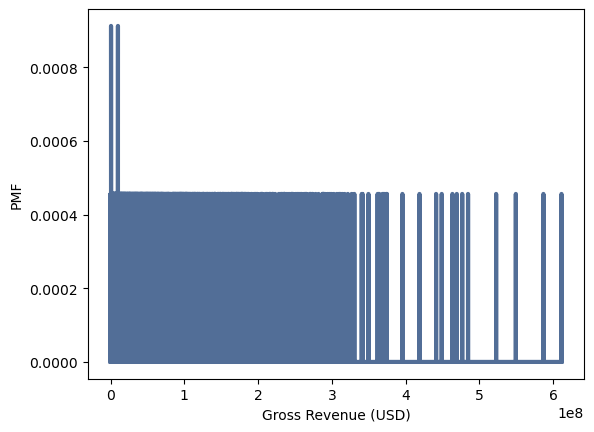

In [96]:
#Scenario 1: PMF of Gross Revenue of Comedy Movies
#first subset data
gross_comedy = moviedf.gross[moviedf.genre == "Comedy"]

#create pmf object and plot
pmfc = thinkstats2.Pmf(gross_comedy, label="Gross Revenue: Comedy Movies")
thinkplot.Pmf(pmfc)
thinkplot.Config(xlabel="Gross Revenue (USD)", ylabel="PMF")


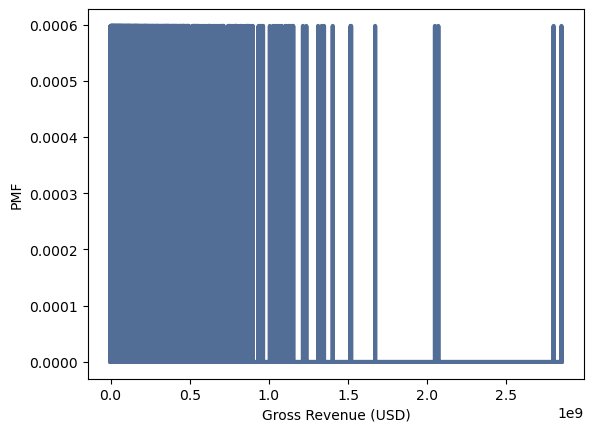

In [97]:
#Scenario 2: PMF of Gross Revenue of Action Movies
#first subset data
gross_action = moviedf.gross[moviedf.genre == "Action"]

#create pmf object and plot
pmfa = thinkstats2.Pmf(gross_action, label="Gross Revenue: Action Movies")
thinkplot.Pmf(pmfa)
thinkplot.Config(xlabel="Gross Revenue (USD)", ylabel="PMF")


## CDF

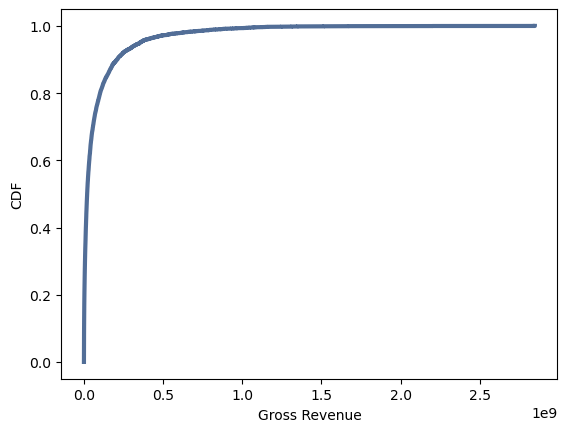

In [45]:
# Working with our variable gross
cdf = thinkstats2.Cdf(moviedf.gross, label='Gross Revenue CDF')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Gross Revenue', ylabel='CDF', loc='upper left')

As you can see above, the CDF of the gross revenue for our data appears to follow a logorithmic path as it progresses. It's highly possible that the distribution for this varaible is a log normal distribution. If we look back to the histogram of this variable, it does appear to support this claim.

## Analytical Distribution Plot

In [115]:
grev = moviedf.gross.dropna()
print(grev)

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7653         3661.0
7655    240663149.0
7656       413378.0
7657     25818882.0
7659        13266.0
Name: gross, Length: 7479, dtype: float64


In [116]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label="weights")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 7479 68264776.6918565 119488967.42417742


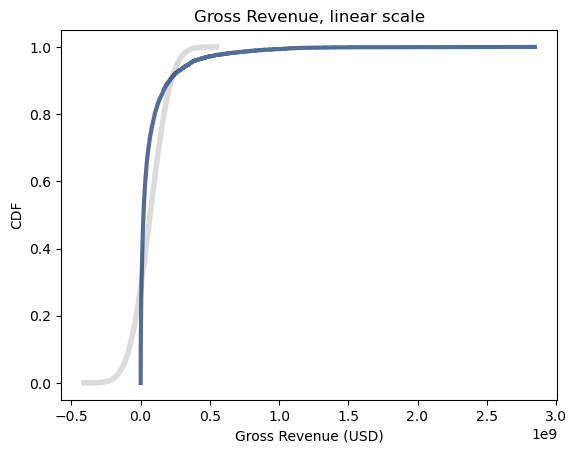

In [117]:
MakeNormalModel(grev)

thinkplot.Config(
    title="Gross Revenue, linear scale",
    xlabel="Gross Revenue (USD)",
    ylabel="CDF",
    loc="upper right",
)

n, mean, std 7479 7.210627628640832 0.8887513564649834


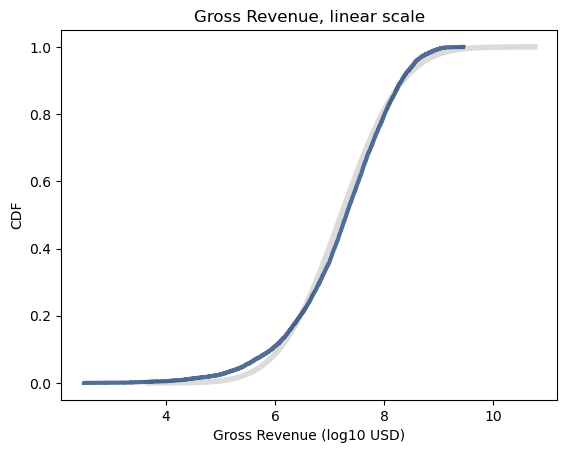

In [119]:
log_grev = np.log10(grev)
MakeNormalModel(log_grev)

thinkplot.Config(
    title="Gross Revenue, linear scale",
    xlabel="Gross Revenue (log10 USD)",
    ylabel="CDF",
    loc="upper right",
)

In [120]:
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label="weights")

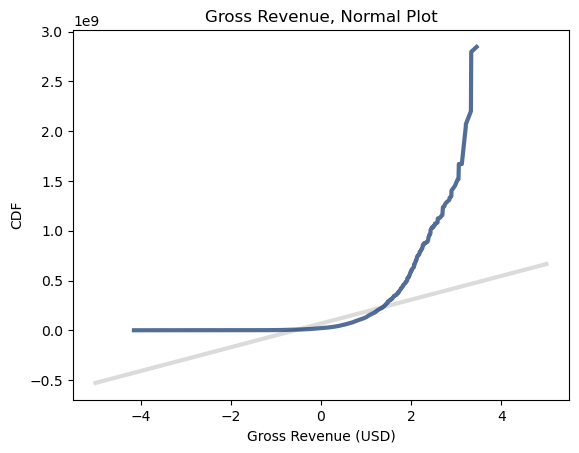

In [122]:
MakeNormalPlot(grev)
thinkplot.Config(
    title="Gross Revenue, Normal Plot",
    xlabel="Gross Revenue (USD)",
    ylabel="CDF",
    loc="upper left",
)

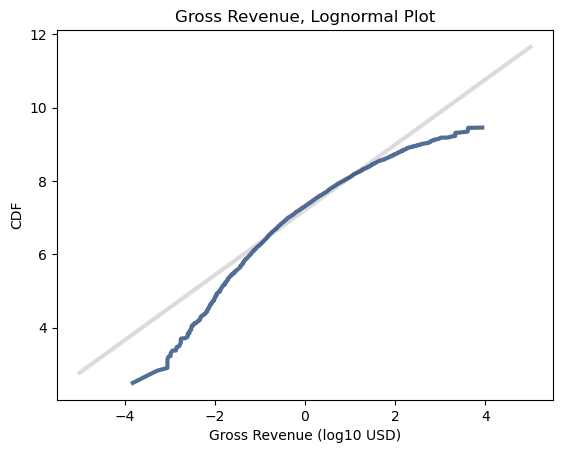

In [123]:
MakeNormalPlot(log_grev)
thinkplot.Config(
    title="Gross Revenue, Lognormal Plot",
    xlabel="Gross Revenue (log10 USD)",
    ylabel="CDF",
    loc="upper left",
)

    Previously I mentioned that the distribution of the Gross Revenue for the Movie Industry data set could possibly follow a log-normal distribution. Considering the figures above, it's clear to see that a log-normal distribution fits the data better than just a normal distribution. Through the graphs we see an improvement when we apply a logarithmic transformation to our data.

## Variable Relationships: Scatter/Line Plots

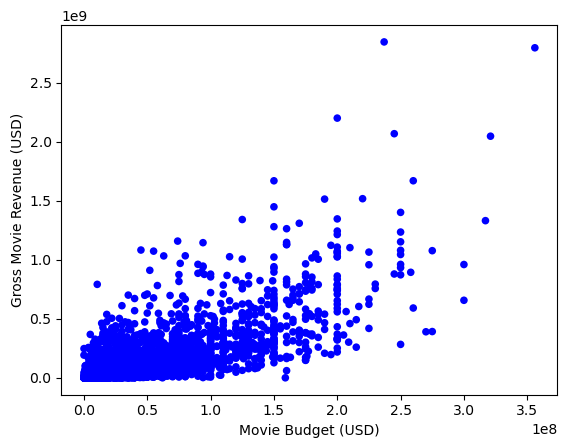

In [46]:
#Relationship 1: Plotting budget and gross revenue
thinkplot.Scatter(moviedf.budget, moviedf.gross, alpha=1)
thinkplot.Config(xlabel='Movie Budget (USD)',
                 ylabel='Gross Movie Revenue (USD)',
                 legend=False)

In [143]:
#covarience function
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

#pearson's correlation function
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

#covarience
moviedf = moviedf[-moviedf.budget.isnull()]
moviedf = moviedf[-moviedf.gross.isnull()]

budget = moviedf.budget
gross = moviedf.gross

cov_bg = Cov(budget, gross)

#pearson's correlation
cor_bg = Corr(budget, gross)

print("Variables: Budget and Gross" ,"\nCovarience: ", cov_bg, "\nCorrelation: ", cor_bg)

Variables: Budget and Gross 
Covarience:  5754614010107631.0 
Correlation:  0.7403948929894826


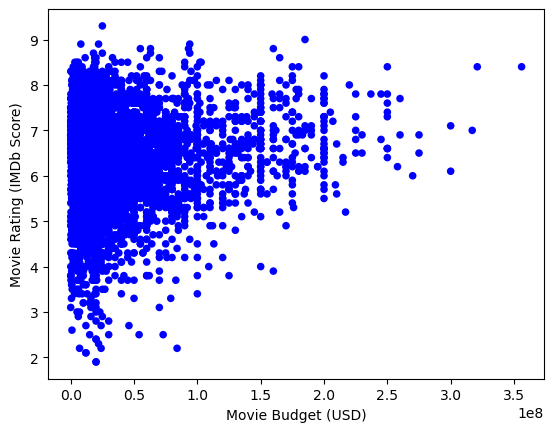

In [22]:
#Relationship 2: Plotting budget and popularity rating (IMDb score)
thinkplot.Scatter(moviedf.budget, moviedf.score, alpha=1)
thinkplot.Config(xlabel='Movie Budget (USD)',
                 ylabel='Movie Rating (IMDb Score)',
                 legend=False)

In [144]:
#covarience
cov_bs = Cov(moviedf.budget, moviedf.score)

#pearson's correlation
cor_bs = Corr(moviedf.budget, moviedf.score)

print("Variables: Budget and Score" ,"\nCovarience: ", cov_bs, "\nCorrelation: ", cor_bs)

Variables: Budget and Score 
Covarience:  2872497.4451108794 
Correlation:  0.0717919879816616


## Hypothesis Testing

In [101]:
#hypothesis test function
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [103]:
#difference in means hypothesis test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

    For our hypothesis test, we will be running a difference in means hypothesis test. We will be furthering our investigation of whether there is a difference in the gross revenue between Comedy movies and action movies.

In [112]:
#separating data again
gross_comedy = moviedf.gross[moviedf.genre == "Comedy"]
gross_action = moviedf.gross[moviedf.genre == "Action"]

#cleaning data of any missing or invalid values
gross_comedy = gross_comedy[-gross_comedy.isnull()]
gross_action = gross_action[-gross_action.isnull()]

#putting data together
data = [gross_comedy, gross_action]

#Hypothesis test and result
gross_ht = DiffMeansPermute(data)
gross_pv = gross_ht.PValue()

#resulting pvalue
print(gross_pv)


0.0


    As you can see we got a resulting p-value of 0.0. This is of course not possible for an observed p-value but this could be a minor error due to the fact that there could have been some rounding off in some of our calculations. Because of this, if we resulting in a relatively small p-value, the computer system could have rounded the small value to zero. As we recall from previous lessons, when the p-value of a hypthesis test is extremely small, it's safe to say that we can reject the null hypothesis that the means of the two samples are the same and accept the alternative hypothesis that there is a difference between the gross revenue of Comedy movies and the gross revenue of Action movies. 

## Regression Analysis

For our regression analysis, we will create a linear model for the Gross Revenue generated by movies as a function of the budget. We will see how well of a predictor the budget is and we'll see if we can add more varaibles to our model to make it better.

In [124]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [140]:
#cleaning data of any missing or invalid values
moviedf = moviedf[-moviedf.budget.isnull()]
moviedf = moviedf[-moviedf.gross.isnull()]

inter, slope = LeastSquares(moviedf.budget, moviedf.gross)
inter, slope

(-16825009.95297028, 3.3342796500711454)

In [132]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [133]:
fit_xs, fit_ys = FitLine(moviedf.budget, inter, slope)

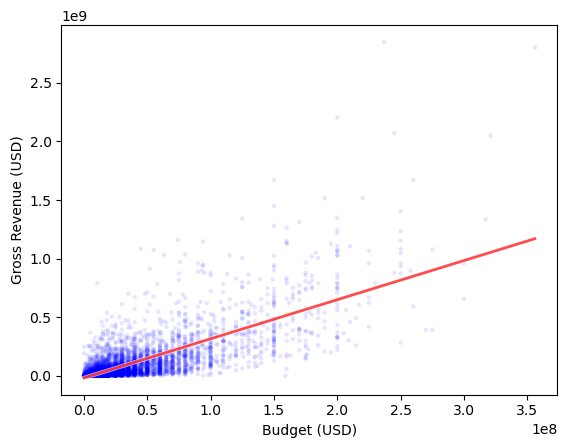

In [135]:
thinkplot.Scatter(moviedf.budget, moviedf.gross, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Budget (USD)",
                 ylabel='Gross Revenue (USD)',
                 legend=False)

In [136]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [142]:
moviedf['residual'] = Residuals(moviedf.budget, moviedf.gross, inter, slope)

1.2606694402826692e-16